In [5]:
import glob,os
import numpy as np
import matplotlib.pylab as plt
from scipy.spatial.distance import pdist,squareform
%matplotlib inline

In [4]:
#read file
data_folder = r'./Data'
file_ = data_folder+os.sep+'IMR90_chr21-28-30Mb.csv'
lines = [ln[:-1].split(',') for ln in open(file_,'r')]

#keep only data enties and reorganize the data
keep = np.array(list(map(len, lines))) > 1
data = np.array([line for line,kp in zip(lines,keep) if kp][1:],dtype=float)
chromosomes = data[:,0]
nchr = len(np.unique(chromosomes))
zxys = data[:,2:].reshape([nchr,-1,3])
print(zxys.shape)

(4871, 65, 3)


In [6]:
distance_mats=np.array(list(map(squareform,map(pdist,zxys))))
med_mat = np.nanmedian(distance_mats,axis=0)

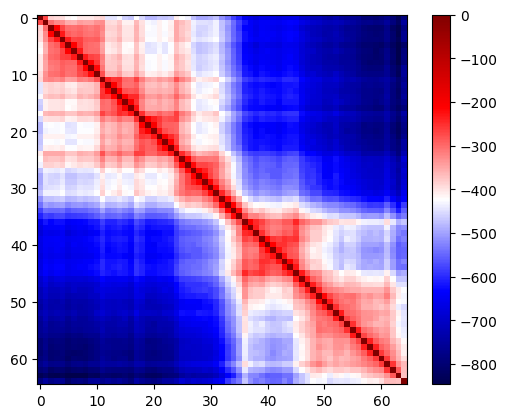

In [7]:
plt.figure()
plt.imshow(-med_mat,interpolation='nearest',cmap='seismic')
plt.colorbar()
plt.show()

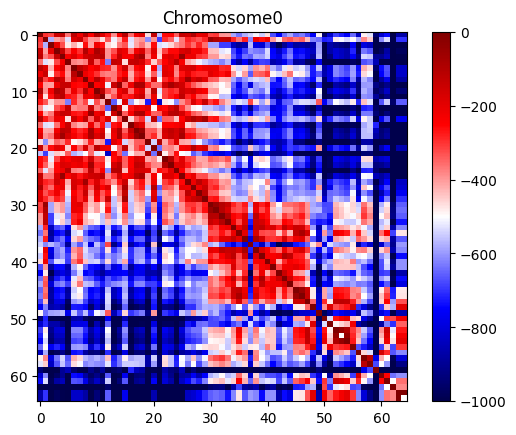

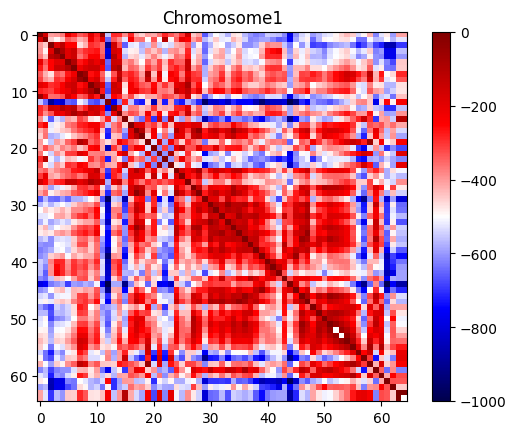

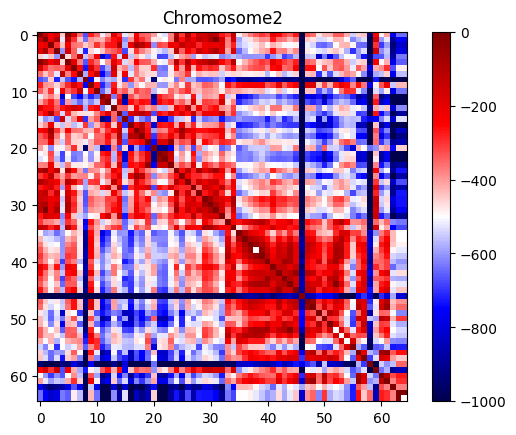

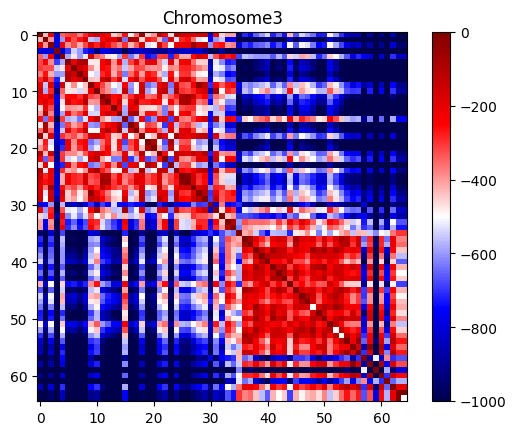

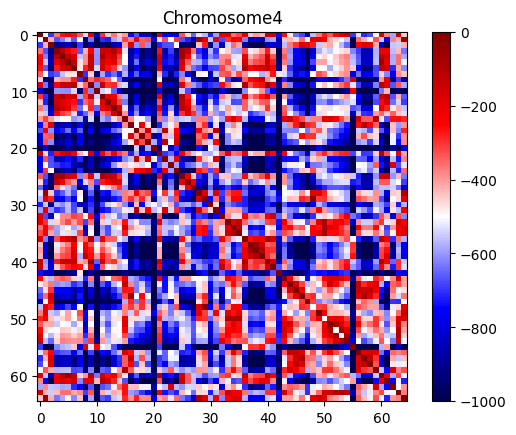

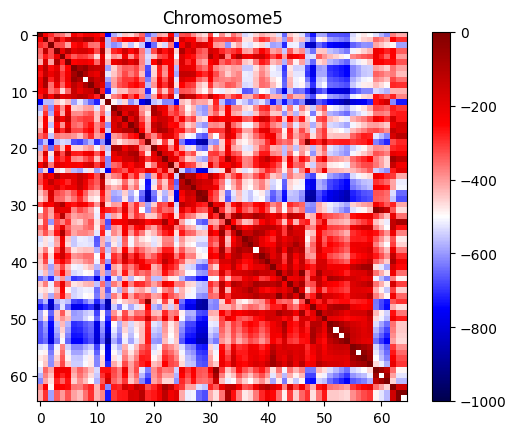

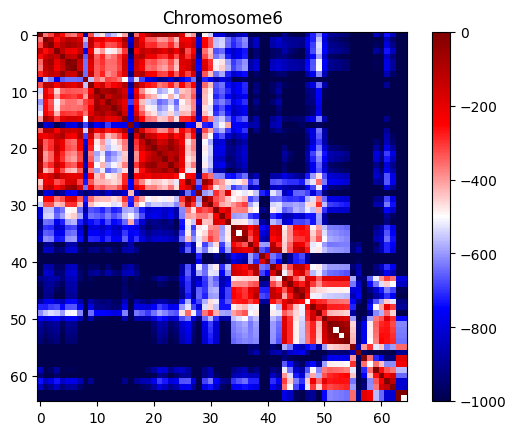

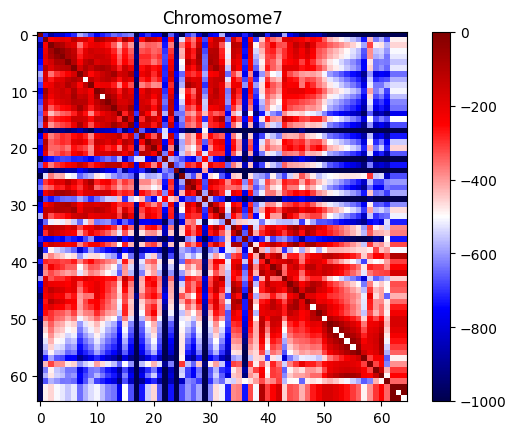

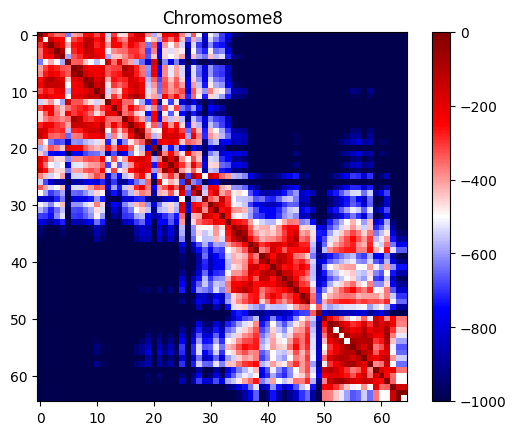

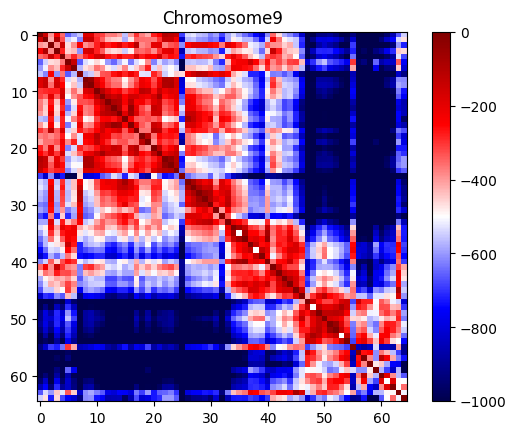

In [ ]:
def interp1dnan(A):
    A_=np.array(A)
    missing = np.isnan(A)
    nonmissing = ~missing
    xp = np.where(nonmissing)[0]
    fp = A[nonmissing]
    x  = np.where(missing)[0]
    A_[missing] = np.interp(x, xp, fp)
    return A_

def plot_map(zxy,interpolate=True):
    """
    We can interpolate across positions we do not have data (too dim to reliably fit).
    We mark those positions as white on the diagonal.
    """
    zxy_ = np.array(zxy)
    if interpolate:
        zxy_ = np.array([interp1dnan(col) for col in zxy.T]).T
        bad = np.where(np.isnan(zxy[:,0]))[0]
    mat_ = squareform(pdist(zxy_))
    mat_[bad,bad]=np.nan
    plt.imshow(-mat_,interpolation='nearest',cmap='seismic',vmin=-1000,vmax=0)

for i in range(10):
    plt.figure()
    plt.title('Chromosome'+str(i))
    
    plot_map(zxys[i])
    
    plt.colorbar()
    plt.show()